# Chapter 2.1 - Deep Learning with Python - A look at the MNIST dataset

### Import the dataset included in keras and get familiarized with the data representation

In [6]:
from keras.datasets import mnist

(train_images,train_labels), (test_images,test_labels) = mnist.load_data()

Using TensorFlow backend.
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as

In [7]:
train_images.shape

(60000, 28, 28)

Note the dimensions, exploring the dataset we can see its an array storing rgb values, size of images are 28x28 px

In [8]:
train_images[0].shape

(28, 28)

In [9]:
train_labels[0]

5

Made a small visualization loop for the digits

In [10]:
for idx,i in enumerate(train_images[0]):
    for j in i:
        if j!=0:
            print("\x1b[0;22;40m \x1b[0m",end=' ')
        else:
            print(" ",end=' ')
    print("\n")

### Now we build the deep neural network with keras

In [11]:
from keras import models
from keras import layers

Set up layers


In [12]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

Set loss function, optimizer and metrics

In [13]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

Prepping the data, making it one dimensional on the pixel domain, scaling RGB values from 0 to 1

In [14]:
train_images.shape

(60000, 28, 28)

In [15]:
train_images=train_images.reshape(60000,28*28)
train_images.shape

(60000, 784)

In [16]:
train_images=train_images.astype('float32')/255

In [17]:
test_images=test_images.reshape(10000,28*28)
test_images.shape
test_images=test_images.astype('float32')/255

Do one-hot-encoding or turning into categorical values the labels for identifying the digits

In [18]:
from keras.utils import to_categorical

train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [19]:
test_labels.shape

(10000, 10)

NOTE: See how this increased the dimensionality to use a binary indicator to identify a digit

In [20]:
network.fit(train_images,train_labels, epochs=25, batch_size=128)


Epoch 1/25
60000/60000 [==============================] - 3s 55us/step - loss: 0.2230 - accuracy: 0.9313
Epoch 2/25
60000/60000 [==============================] - 3s 52us/step - loss: 0.0814 - accuracy: 0.9754
Epoch 3/25
60000/60000 [==============================] - 3s 52us/step - loss: 0.0544 - accuracy: 0.9835
Epoch 4/25
60000/60000 [==============================] - 3s 51us/step - loss: 0.0390 - accuracy: 0.9877
Epoch 5/25
60000/60000 [==============================] - 3s 51us/step - loss: 0.0299 - accuracy: 0.9905
Epoch 6/25
60000/60000 [==============================] - 3s 52us/step - loss: 0.0232 - accuracy: 0.9929
Epoch 7/25
60000/60000 [==============================] - 3s 56us/step - loss: 0.0183 - accuracy: 0.9939
Epoch 8/25
60000/60000 [==============================] - 3s 51us/step - loss: 0.0153 - accuracy: 0.9952
Epoch 9/25
60000/60000 [==============================] - 3s 51us/step - loss: 0.0124 - accuracy: 0.9963
Epoch 10/25
60000/60000 [=============================

In [21]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 50us/step


In [22]:
print(test_loss, test_acc)

0.18201259261865868 0.9843000173568726


### Let's play around now. I made a list of handwritten digits on paint (with my handstyle), let's see if it can recognize them

Open testing image

In [123]:
from PIL import Image, ImageOps

im = Image.open("MNIST Testing 8c.png")
print(im.format, im.size, im.mode)

PNG (28, 28) RGBA


Convert to greyscale

In [124]:
im = im.convert("L")
print(im.format, im.size, im.mode)

None (28, 28) L


In [125]:
im

In [126]:
import numpy as np
im_mtx=np.asarray(im)
im_mtx.shape

(28, 28)

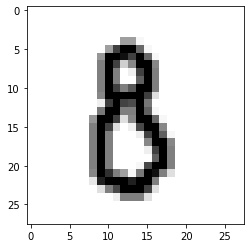

In [127]:
import matplotlib.pyplot as plt
plt.imshow(im_mtx, cmap=plt.cm.binary)
plt.show()

Convert greyscale image into binary matrix

In [128]:
dnn_mtx=[]
for row,i in enumerate(im_mtx):
    for col,j in enumerate(i):
        #print(row,col,j)
        dnn_mtx.append(j/255)
        #else:
         #   dnn_mtx.append(1)
        

In [129]:
len(dnn_mtx)

784

Convert to numpy array and shape it so that it can be processed by dnn

In [130]:
dnn_mtx=np.asarray(dnn_mtx)
dnn_mtx=np.reshape(dnn_mtx, (1,784))
dnn_mtx.shape

(1, 784)

Predict label using trained network

In [131]:
res=network.predict(dnn_mtx)

In [132]:
for idx,i in enumerate(res[0]):
    print(idx,i*100)

0 7.7646959703386e-13
1 1.7945324046197975e-11
2 3.138668939347785e-13
3 4.656776266681595e-11
4 3.2360042481738554e-13
5 3.7184907930587485e-10
6 1.4894759037265004e-09
7 1.6820330635739143e-15
8 100.0
9 3.5625270637142104e-12


**NOTE:** It seems the NN is not able to identify most of my handwritten digits!!! 

Things to observe:     
  
 **1:** Neither thin line and thick line (no letter & b label) are identified correctly (YES, we are accounting for MNIST being black background, white numbers, we just invert the colors)  
 
 **2:** MNIST like images (c label) work better, but still unacceptable (1,4,6 failed)